# Ejercicio de regresión logística

Un estudio considera que existe relación entre el hecho de que un estudiante asista a clases de repaso de lectura (sí = 1, no = 0), la nota que obtiene en un examen de lectura estándar (realizado antes de iniciar las clases de repaso) y el sexo (hombre = 1, mujer = 0). Se quiere generar un modelo en el que a partir de las variables puntuación del examen y sexo, prediga la probabilidad de que el estudiante tenga que asistir a clases de repaso.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score, classification_report

## Carga de datos

In [2]:
# Carga de datos
data_frame = pd.read_csv("datos.csv",sep=";")
data_frame.head()

,sexo,examen_lectura,clases_repaso
0,hombre,91.0,0
1,hombre,77.5,0
2,mujer,52.5,0
3,mujer,54.0,0
4,mujer,53.5,0


# Análisis de las observaciones


Las tablas de frecuencia así como representaciones gráficas de las observaciones son útiles para intuir si las variables independientes escogidas están relacionadas con la variable respuesta y por lo tanto ser buenos predictores.

### Consideraciones

1. El set de datos está formado por filas y columnas. Las filas corresponden a las observaciones y las columnas son las características (features, variables). 

2. Cada característica puede ser numérica o catgórica; particularmente, muchos algoritmos requieren que las columnas con las cuales se quiere trabajar deben ser numéricas. Lo anterior lleva a un proceso, eventualmente, de transformación de los datos.

## Es hora de comenzar con la exploración de los datos ...

## Tamaño del dataset

In [3]:
data_frame.shape

(189, 3)

## Tipos de datos de las columnas

In [4]:
# Revisión de los tipos de datos
data_frame.dtypes

sexo               object
examen_lectura    float64
clases_repaso       int64
dtype: object

### Tratamiento de valores nulos

In [5]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de sexo = 0
Total de valores nulos de examen_lectura = 0
Total de valores nulos de clases_repaso = 0


### Técnicas de tratamiento de nulos

1. Eliminar las observaciones (opción simple)
2. Imputación (mejor opción). Acá se rellenan los valores vacíos con algún valor, puede ser el promedio del valor de la columna. Puede ser el valor más repetido en el caso de una variable categórica.
3. Una extensión de la imputación. Se agrega una columna indicando que el valor ha sido reemplazado, de esta forma, se mantiene "identificados" a los valores nulos

## Exploración de valores 
### Algunas estadísticas

In [6]:
data_frame.describe()

,examen_lectura,clases_repaso
count,189.000000,189.000000
mean,64.904762,0.312169
std,15.292239,0.464609
min,40.000000,0.000000
25%,55.000000,0.000000
50%,60.500000,0.000000
75%,70.000000,1.000000
max,125.000000,1.000000


La función anterior obtiene las estadísticas de 3 columnas de las cuales la última no representa ningún valor para el modelo. La columna del genero no se presenta ya que es categórica

La interpretación (considerando la columa examen_lectura):

1. Hay 189 valores en la columna
2. El promedio corresponde a 64.9
3. La desviación estándar es de 15.29, lo que quiere decir, los resultados de las observaciones varía dentro del intervalo [49.61, 80,19] [mean - std; mean + std]
4. Valor mínimo de la columna es 40
5. El 25% de las observaciones es menor a 55
6. El 50% de las observaciones es menor a 60.5
7. El 75% de las observaciones es menor a 70
8. El valor máximo de la columna es 125

## Agrupaciones de datos 

In [7]:
# Total de observaciones por género
print(data_frame.groupby('sexo').size())

sexo
hombre    93
mujer     96
dtype: int64


In [9]:
# Total de observaciones por clase_repaso
print(data_frame.groupby('clases_repaso').size())

clases_repaso
0    130
1     59
dtype: int64


In [11]:
# transformaremos la columna categorica sexo en numerica 
d_genero = { 'hombre': 0, 'mujer': 1}
data_frame['genero'] = data_frame['sexo'].map(d_genero)
data_frame

,sexo,examen_lectura,clases_repaso,genero
0,hombre,91.0,0,0
1,hombre,77.5,0,0
2,mujer,52.5,0,1
3,mujer,54.0,0,1
4,mujer,53.5,0,1
...,...,...,...,...
184,mujer,47.5,1,1
185,hombre,50.0,1,0
186,hombre,47.0,1,0
187,hombre,71.0,1,0


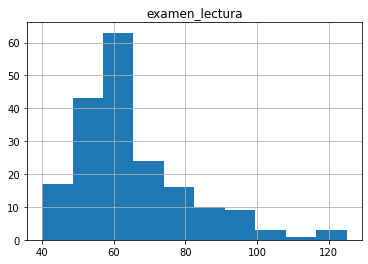

In [10]:
data_frame.drop(['clases_repaso','sexo'],1).hist()
plt.show()

### Selección de las características (columnas) con las cuales se va a trabajar

Como ya se había mencionado anteriormente, muchas veces, se descartan columnas que no tienen mucho aporte en el análisis y, en este caso, se van a seleccionar de forma arbitraria. Sin embargo, en ocasiones es posible seleccionarlas usando un criterio más formal, pro ejemplo, considere la predicción del precio de una vivienda sabiendo que se tienen datos de la vivienda: número de habitaciones, cuenta o no con estacionamiento, número de baños, si se encuentra en condominio o no (incluya otras que se le ocurran); en este caso, sería posible generar un "mapa de calor" para saber la correlación de las variables con la variable de precio de la casa (valor que se quiere predecir), con eso se podrán incluir en el análisis aquellas variables que presenten una correlación más alta.

In [12]:
X = data_frame[['examen_lectura','genero']]
y = data_frame['clases_repaso']
X.shape

(189, 2)

## Transformación

In [13]:
y.shape

(189,)

### Revisemos lo que quedo en X y en y

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [15]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [18]:
y_pred.shape

(38,)

# Evaluación del modelo

In [17]:
matriz=confusion_matrix(y_pred,y_test)
print (matriz)

[[26 11]
 [ 0  1]]


Comencemos entonces calculando la precisión del algoritmo para ello utilizamos la librería metrics de scikit-learn e importamos precision_score, y la implementamos junto con los datos reales y los que hemos obtenidos utilizando el modelo.

In [19]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

1.0


El resultado de la precisión es de 1, demostrando que nuestro modelo es bastante bueno.

Calculemos ahora la exactitud del modelo, por lo que debemos ahora importar accuracy_score, de la misma librería de metrics.

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7105263157894737


Aplicamos este comando a los datos de pruebas y obtenemos una exactitud de 0,71 .Esto coincide con lo que vimos en la matriz de confusión

In [111]:
print (classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83        37
           1       0.08      1.00      0.15         1

    accuracy                           0.71        38
   macro avg       0.54      0.85      0.49        38
weighted avg       0.98      0.71      0.81        38

